In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)


In [2]:
df=pd.DataFrame(pd.read_csv("all_matches.csv",low_memory=False))
df.fillna(0,inplace=True)

In [3]:
ingF=1
ingC=1
column_names = ["venue", "inning","Date", "bat_team","bowl_team","batsmen","bowlers","run"]#batsmen and bowlers should be a list
DF = pd.DataFrame(columns = column_names)
run=0
LIST1=[]
LIST2=[]
for i in range(0,194353):
    ingC=df.at[i,"innings"]
    ingF=df.at[i+1,"innings"]
    if (ingC==ingF):
        if df.at[i,"ball"]<6.0:
            run=run   +df.at[i,"runs_off_bat"]+df.at[i,"extras"]+df.at[i,"wides"]+df.at[i,"noballs"]+df.at[i,"byes"]+df.at[i,"legbyes"]
        if df.at[i,"striker"] not in LIST1:
            LIST1.append(df.at[i,"striker"])
        if df.at[i,"bowler"] not in LIST2:
            LIST2.append(df.at[i,"bowler"])
    else:
        if df.at[i,"ball"]<6.0:
            run=run   +df.at[i,"runs_off_bat"]+df.at[i,"extras"]+df.at[i,"wides"]+df.at[i,"noballs"]+df.at[i,"byes"]+df.at[i,"legbyes"]
        if df.at[i,"striker"] not in LIST1:
            LIST1.append(df.at[i,"striker"])
        if df.at[i,"bowler"] not in LIST2:
            LIST2.append(df.at[i,"bowler"])
        lis=[]
        lis.append(df.at[i,"venue"])
        lis.append(df.at[i,"innings"])
        x=str(df.at[i,"start_date"])
        lis.append(int(x[0:4]))
        lis.append(df.at[i,"batting_team"])
        lis.append(df.at[i,"bowling_team"])
        lis.append(LIST1)
        lis.append(LIST2)
        lis.append(run)
        DF.loc[len(DF.index)] = lis 
        run=0
        LIST1=[]
        LIST2=[]
        
    

In [4]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,AD Russell,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [5]:
DF=DF[DF["inning"]<=2]
DF['batsman1'] = DF.batsmen.apply(lambda x: x[0])
DF['batsman2'] = DF.batsmen.apply(lambda x: x[1])
DF['bowler1'] = DF.bowlers.apply(lambda x: x[0])
DF['bowler2'] = DF.bowlers.apply(lambda x: x[1])
venue_encoder=LabelEncoder()
player_encoder=LabelEncoder()
team_encoder=LabelEncoder()
DF["venue"]=venue_encoder.fit_transform(DF["venue"])
DF["batsman1"]=player_encoder.fit_transform(DF["batsman1"])
DF["batsman2"]=player_encoder.fit_transform(DF["batsman2"])
DF["bowler1"]=player_encoder.fit_transform(DF["bowler1"])
DF["bowler2"]=player_encoder.fit_transform(DF["bowler2"])
DF["bat_team"]=team_encoder.fit_transform(DF["bat_team"])
DF["bowl_team"]=team_encoder.fit_transform(DF["bowl_team"])
DF

,venue,inning,Date,bat_team,bowl_team,batsmen,bowlers,run,batsman1,batsman2,bowler1,bowler2
0,15,1,2008,7,13,"[SC Ganguly, BB McCullum, RT Ponting, DJ Husse...","[P Kumar, Z Khan, AA Noffke, JH Kallis, SB Jos...",71.0,116,14,124,219
1,15,2,2008,13,7,"[R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","[AB Dinda, I Sharma, AB Agarkar, SC Ganguly, L...",33.0,93,145,11,77
2,27,1,2008,0,5,"[PA Patel, ML Hayden, MEK Hussey, MS Dhoni, SK...","[B Lee, S Sreesanth, JR Hopes, IK Pathan, K Go...",56.0,87,82,28,178
3,27,2,2008,5,0,"[K Goel, JR Hopes, KC Sangakkara, Yuvraj Singh...","[JDP Oram, MS Gony, M Muralitharan, P Amarnath...",65.0,53,57,75,133
4,9,1,2008,10,3,"[T Kohli, YK Pathan, SR Watson, M Kaif, DS Leh...","[GD McGrath, B Geeves, MF Maharoof, R Bhatia, ...",42.0,129,149,57,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1656,19,1,2021,8,13,"[RG Sharma, CA Lynn, SA Yadav, Ishan Kishan, H...","[Mohammed Siraj, KA Jamieson, YS Chahal, Shahb...",41.0,99,19,116,103
1657,19,2,2021,13,8,"[Washington Sundar, V Kohli, RM Patidar, GJ Ma...","[TA Boult, JJ Bumrah, M Jansen, KH Pandya, RD ...",54.0,139,141,178,90
1658,41,1,2021,0,2,"[RD Gaikwad, F du Plessis, MM Ali, SK Raina, A...","[CR Woakes, Avesh Khan, R Ashwin, TK Curran, A...",36.0,97,34,42,29
1659,41,2,2021,2,0,"[PP Shaw, S Dhawan, RR Pant, MP Stoinis]","[DL Chahar, SM Curran, SN Thakur, RA Jadeja, M...",65.0,91,113,48,185


In [6]:
#X = DF
#lis=["batsmen","bowlers","batsman1","bowler1","batsman2","bowler2"]
#y = DF.iloc[:, 7].values
#X.drop(lis,axis=1,inplace=True)



In [7]:
x=DF
dic={}
for i in range(0,42):
    print(i,end=":'")
    print(i,end="',")
#x["venue"]=x["venue"].map({0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20',21:'21',22:'22',23:'23',24:'24',25:'25',26:'26',27:'27',28:'28',29:'29',30:'30',31:'31',32:'32',33:'33',34:'34',35:'35',36:'36',37:'37',38:'38',39:'39',40:'40',41:'41'})
#x=pd.get_dummies(x,columns=["venue"],prefix='',prefix_sep='')

0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20',21:'21',22:'22',23:'23',24:'24',25:'25',26:'26',27:'27',28:'28',29:'29',30:'30',31:'31',32:'32',33:'33',34:'34',35:'35',36:'36',37:'37',38:'38',39:'39',40:'40',41:'41',

In [8]:
DF.to_csv('Cleaned.csv')

In [9]:
y = x.iloc[:, 7].values #Label
lis=["batsmen","bowlers","batsman1","bowler1","batsman2","bowler2","run"]
X = x.drop(lis,axis=1)


In [10]:
pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
print(X_train)
print(y_train)

      venue inning  Date  bat_team  bowl_team
949      20      2  2015         5         10
1416     12      1  2018         5          8
792      29      1  2013         7         14
1273      9      2  2017         3         13
779      40      2  2013        10          8
...     ...    ...   ...       ...        ...
771      13      2  2013         7         13
845      13      2  2014         7          0
1228     31      1  2017         4          8
563      37      2  2012         9          1
692      37      1  2013        14          9

[1224 rows x 5 columns]
[54. 51. 40. ... 51. 47. 27.]


In [11]:
lin=LinearRegression()
#lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)


R-squared value: -1.5851594549995518


In [12]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))

Custom accuracy: 59.168704156479215


In [13]:
p=pd.DataFrame(X_test)
q=pd.DataFrame(y_test)
r=pd.DataFrame(y_pred)

p["run"]=y_test
p["RUN"]=y_pred
p

,venue,inning,Date,bat_team,bowl_team,run,RUN
1211,20,2,2017,11,14,56.0,50.015855
591,40,2,2012,8,0,46.0,49.760684
606,37,1,2012,13,9,71.0,46.490742
531,8,2,2012,7,5,51.0,49.891019
76,32,1,2008,10,13,59.0,44.661289
981,8,2,2015,7,0,41.0,51.665810
1279,15,2,2017,8,7,41.0,51.174652
1522,6,1,2019,2,0,42.0,51.147409
933,30,2,2015,5,10,41.0,49.668413
1529,7,2,2020,5,2,42.0,53.182464


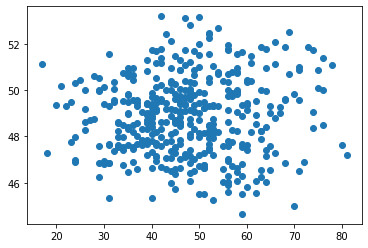

In [14]:
mean_absolute_error(y_test, y_pred)
plt.scatter(y_test, y_pred)


(array([ 1.,  1.,  0.,  1.,  1.,  1.,  2.,  4.,  1.,  4.,  1.,  2.,  6.,
         4.,  7.,  5.,  6.,  7., 12.,  9.,  7.,  5., 13., 15., 15., 12.,
         8., 13., 15., 18., 12., 18., 11., 13., 11., 15., 13.,  5.,  4.,
        18.,  6., 12.,  9.,  8.,  4.,  5.,  7.,  7.,  4.,  4.,  2.,  4.,
         2.,  2.,  4.,  1.,  1.,  3.,  2.,  3.,  0.,  1.,  0.,  2.]),
 array([17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
        30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
        69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.]),
 <a list of 64 Patch objects>)

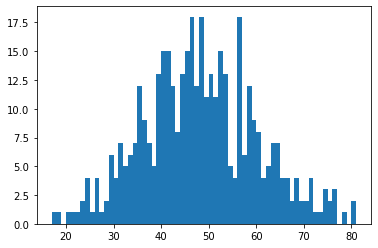

In [15]:
import numpy as np
plt.hist(y_test,bins=np.arange(y_test.min(), y_test.max()+1))

In [18]:
list(venue_encoder.inverse_transform([2, 2, 1]))

['Brabourne Stadium', 'Brabourne Stadium', 'Barabati Stadium']

In [19]:
import joblib
joblib.dump(lin,"cantdobetter.joblib")
joblib.dump(venue_encoder,"venue.joblib")
joblib.dump(team_encoder,"team.joblib")

['team.joblib']